In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv('/content/train_dataset.csv')
test_data = pd.read_csv('/content/test_dataset.csv')

In [3]:
train_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [9]:
#train_data.info()
# train_data.shape

In [23]:
label_encoders = {}
labels = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for col in labels:
  le = LabelEncoder()
  train_data[col] = le.fit_transform(train_data[col])
  test_data[col] = le.fit_transform(test_data[col])
  label_encoders[col] = le

X = train_data.drop(['id','satisfaction'], axis = 1)
y = train_data['satisfaction']

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state = 12)

model = RandomForestClassifier(n_estimators=100, random_state=12)
model.fit(X_train,y_train)

y_pred = model.predict(X_valid)

X_test = test_data.drop('id', axis = 1)
model_predict = model.predict(X_test)

In [29]:
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC AUC Score: {roc_auc:.4f}')

ROC AUC Score: 0.9549


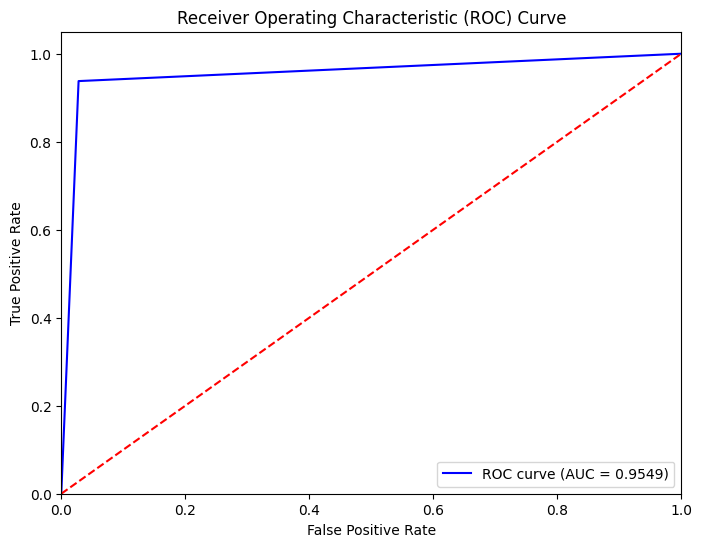

In [30]:
fpr, tpr, _ = roc_curve(y_valid, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random model line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
submission_file = pd.DataFrame({'id':test_data['id'], 'satisfaction':model_predict})

In [32]:
submission_file.to_csv('my_submission_020425.csv', index = False)